In [6]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master')
sys.path.append('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/training')
sys.path.append('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/preprocessing/')
from layers import nms,iou

%matplotlib inline

In [7]:
"""

double check that the process for creating the clan data is the same for
dicom and mhd; this verifies the process before moving to the cluster

"""



dic_clean = np.load('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/prep_result/dicom/summit-2264-sze_Y0_BASELINE_A_clean.npy')
mhd_clean = np.load('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/prep_result/mhd/summit-2264-sze_Y0_BASELINE_A_clean.npy')

dic_lbl = np.load('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/dicom/summit-2264-sze_Y0_BASELINE_A_lbb.npy')
mhd_lbl = np.load('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/mhd/summit-2264-sze_Y0_BASELINE_A_lbb.npy')

dic_pbb = np.load('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/dicom/summit-2264-sze_Y0_BASELINE_A_pbb.npy')
mhd_pbb = np.load('/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/mhd/summit-2264-sze_Y0_BASELINE_A_pbb.npy')

print('Do the _clean numpy arrays from mhd and dicom match?', np.array_equal(dic_clean, mhd_clean))
print('Do the _label numpy arrays from mhd and dicom match?', np.array_equal(dic_lbl, mhd_lbl))
print('Do the _pbb numpy arrays from mhd and dicom match?', np.array_equal(dic_pbb, mhd_pbb))


Do the _clean numpy arrays from mhd and dicom match? True
Do the _label numpy arrays from mhd and dicom match? True
Do the _pbb numpy arrays from mhd and dicom match? True


In [8]:
# find a scan that has been downloaded
import os

BBOX_PATH = '/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result'
list_test_scans = [
    os.path.join(BBOX_PATH, lbb) 
    for lbb in os.listdir(BBOX_PATH) 
    if lbb.endswith('_lbb.npy') and \
        lbb.split('_',1)[0] in os.listdir('/Users/john/Projects/SOTAEvaluationNoduleDetection/scans/lung50')
    ]


list_test_scans

['/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/summit-7895-qcw_Y0_BASELINE_A_lbb.npy',
 '/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/summit-9769-yta_Y0_BASELINE_A_lbb.npy',
 '/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/summit-7824-udr_Y0_BASELINE_A_lbb.npy',
 '/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/summit-6862-hmk_Y0_BASELINE_A_lbb.npy',
 '/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/summit-2952-zws_Y0_BASELINE_A_lbb.npy',
 '/Users/john/Projects/SOTAEvaluationNoduleDetection/models/DSB2017-master/bbox_result/summit-5437-xpr_Y0_BASELINE_A_lbb.npy']

In [9]:
"""
check the lbb and pbb pulled from cluster to check that things are consistent with
what was produced locally

"""
from utils import *

stem = 'summit-7895-qcw'

lbl = np.load(f'{BBOX_PATH}/{stem}_Y0_BASELINE_A_lbb.npy')
pbb = np.load(f'{BBOX_PATH}/{stem}_Y0_BASELINE_A_pbb.npy')
pbb = nms(pbb,0.05)
pbb = pbb[pbb[:,0]>-1]

lbl_local = np.load(f'{BBOX_PATH}/mhd/{stem}_Y0_BASELINE_A_lbb.npy')
pbb_local = np.load(f'{BBOX_PATH}/mhd/{stem}_Y0_BASELINE_A_pbb.npy')
pbb_local = nms(pbb_local,0.05)
pbb_local = pbb_local[pbb_local[:,0]>-1]

print(np.array_equal(lbl_local, lbl))
print(np.array_equal(np.int16(pbb_local), np.int16(pbb)))




True
True


In [10]:
"""
The ground truth is the number of nodules that are in the test_metadata.to_csv

"""

from summit_utils import baseline_algorithm

test_scans = pd.read_csv('../output/metadata/test_scans.csv')
test_metadata = pd.read_csv('../output/metadata/test_metadata.csv')

test_metadata.loc[:, 'management_plan'] = test_metadata.apply(baseline_algorithm, axis=1)


print(f'There are {test_metadata.shape[0]} nodules over {test_scans.shape[0]} scans.')


sum(test_metadata.participant_id.isin([
'summit-6632-sgf',
'summit-3447-jnz',
'summit-5997-wac',
'summit-4582-ujd',
'summit-5568-tkm',
'summit-4328-tdk',
'summit-7888-dba',
'summit-4736-btp',
'summit-5988-ttr']
))

test_metadata.head()

There are 1482 nodules over 905 scans.


,main_form_instance_id,main_form_instance_status,main_participant_id,main_completed_time,form_instance_status,participant_id,index,nodule_brock_score,nodule_category,nodule_diameter_mm,...,nodule_type,nodule_volume_core,nodule_volume_doubling_time,nodule_volume_percentage_change,nodule_volume_volume_double_time_core,nodule_x_coordinate,nodule_y_coordinate,nodule_z_coordinate,Saved_Y0,management_plan
0,TUFA48AA4Umf5-42b9T8oVX-Ngj9zgkj_WSGKGJbKWs,COMPLETED,summit-2248-shc,2019-09-05T06:05:29Z,COMPLETED,summit-2248-shc,0.0,0.33,BASELINE,3.8,...,SOLID,0.0,0.0,0.0,0.0,58.70,8.76,-39.39,1,RANDOMISATION_AT_YEAR_1
1,TUFA48AA4Umf5-42b9T8oVX-Ngj9zgkj_WSGKGJbKWs,COMPLETED,summit-2248-shc,2019-09-05T06:05:29Z,COMPLETED,summit-2248-shc,1.0,0.33,BASELINE,3.8,...,SOLID,0.0,0.0,0.0,0.0,-64.97,4.43,-39.50,1,RANDOMISATION_AT_YEAR_1
2,TUFA48AA4Umf5-42b9T8oVX-Ngj9zgkj_WSGKGJbKWs,COMPLETED,summit-2248-shc,2019-09-05T06:05:29Z,COMPLETED,summit-2248-shc,2.0,0.42,BASELINE,4.0,...,SOLID,0.0,0.0,0.0,0.0,-53.36,-13.04,-40.91,1,RANDOMISATION_AT_YEAR_1
3,TUFA48AA4Umf5-42b9T8oVX-Ngj9zgkj_WSGKGJbKWs,COMPLETED,summit-2248-shc,2019-09-05T06:05:29Z,COMPLETED,summit-2248-shc,3.0,0.11,BASELINE,3.0,...,SOLID,0.0,0.0,0.0,0.0,80.50,7.22,-53.74,1,RANDOMISATION_AT_YEAR_1
4,TUFA48AA4Umf5-42b9T8oVX-Ngj9zgkj_WSGKGJbKWs,COMPLETED,summit-2248-shc,2019-09-05T06:05:29Z,COMPLETED,summit-2248-shc,4.0,0.90,BASELINE,4.9,...,SOLID,0.0,0.0,0.0,0.0,-48.53,64.34,-53.62,1,RANDOMISATION_AT_YEAR_1


In [11]:
import math
import os
from pathlib import Path
import warnings

warnings.simplefilter('ignore')

MIN_THRESHOLD = -10000000

class ShapeDifferentException(Exception):
    pass
class TooHighMetricException(Exception):
    pass
    
def merge_lbl_and_metadata(metadata, lbb, scan_id):
    """
        The lbl data only contains adjusted irc coordindates
        and we need to attach nodule details such as type and
        brock score to check for patterns. This is done by
        assuming the read order for generating the lbl is the
        same therefore repeating the process and adding additional
        variables to the adjusted irc data.
    """
    stem = scan_id.split('_',1)[0]

    nodule_metadata = metadata[metadata.main_participant_id==stem]

    if nodule_metadata.shape[0] == 0 and np.array_equal(lbb, [[0,0,0,0]]):
        return None
    
    if nodule_metadata.shape[0] == 0 and not np.array_equal(lbb, [[0,0,0,0]]):
        raise ShapeDifferentException(f'Label and metadata mismatch for stem. md:{metadata.shape[0]}, lbb:{lbb.shape[0]}, {lbb}')
    
    if nodule_metadata.shape[0] > 0 and np.array_equal(lbb, [[0,0,0,0]]):
        raise ShapeDifferentException(f'Label and metadata mismatch for stem. md:{metadata.shape[0]}, lbb:{lbb.shape[0]}, {lbb}')
    
    if nodule_metadata.shape[0] != lbb.shape[0]:
        raise ShapeDifferentException(f'Label and metadata mismatch for stem. md:{metadata.shape[0]}, lbb:{lbb.shape[0]}, {lbb}')
    
    d_mean = np.mean(lbb[:,3] / nodule_metadata.nodule_diameter_mm)
    d_std = np.std(lbb[:,3] / nodule_metadata.nodule_diameter_mm)

    if d_mean > 1 or d_std > 0.0001:
        raise TooHighMetricException(f'Mean is too high for the spacing: {scan_id}')

    nodule_metadata.loc[:,['index','row','col','diameter']] = lbb
    nodule_metadata.loc[:,'threshold'] = MIN_THRESHOLD
    nodule_metadata.loc[:,'name'] = scan_id

    return nodule_metadata[['name','threshold','index', 'row','col','diameter','nodule_type','nodule_brock_score', 'management_plan']]

def combine_pbb(bbox_path, threshold=-1):
    """
        load the candidates for this scan
        use nms to de-duplicate and apply threshold
    """
    pbbs = []
    for pbb_fil in os.listdir(bbox_path):
        if pbb_fil.endswith('_pbb.npy'):
            pbb = np.load(os.path.join(bbox_path, pbb_fil))
            pbb = nms(pbb, 0.05)
            pbb = pbb[pbb[:,0]>threshold]
            if pbb.shape[0]>0:
                df = pd.DataFrame(pbb, columns=['threshold','index', 'row', 'col','diameter'])
                df.loc[:,'name'] = pbb_fil.split('_pbb')[0]
                pbbs.append(df)

    combined_pbb = pd.concat(pbbs)
    return combined_pbb.reset_index().drop('level_0', axis=1)

def combine_metadata(scans, metadata, bbox_path):
    """
        combine the lbl outputs with the original metadata
        this allows for analysis to include the profile and
        identification of nodules that were not missed

    """
    return pd.concat([
        merge_lbl_and_metadata(
            metadata, 
            np.load(Path(bbox_path,scan_id + '_lbb.npy')),
            scan_id)
        for scan_id in scans.scan_id
        if os.path.exists(Path(bbox_path,scan_id + '_lbb.npy'))
    ]).reset_index().rename(columns={'level_0' : 'id'})

combined_nodule_data = combine_metadata(scans=test_scans, metadata=test_metadata, bbox_path=BBOX_PATH)
combined_predictions = combine_pbb(BBOX_PATH)


In [12]:
combined_nodule_data.management_plan.value_counts()

RANDOMISATION_AT_YEAR_1    982
3_MONTH_FOLLOW_UP_SCAN     420
ALWAYS_SCAN_AT_YEAR_1       36
URGENT_REFERRAL             33
Name: management_plan, dtype: int64

In [13]:
from evaluation import noduleCADEvaluation

"""
    The evaluation script accepts 4 parameters

    1. annotations_filename: csv file with following headers:
        - threshold
        - index
        - row
        - col
        - diameter
        - nodule_type
        - brock_score
        - management_plan

    NOTE: Additional nodule fields will need to be added in eval script, fields are hard-coded
    into a nodule class

    2. annotations_excluded_filename: csv containing non-actionable or benign lesions,
    headers as per annotations_filename

    3. seriesuids_filename: single column csv file holding just the scan identifiers

    4. results_filename: csv containing the candidates generated from the detection algorithm.
    Headers as follows:
        - threshold
        - index
        - row
        - col
        - diameter

    5. outputdir: folder to output results to

"""

# double check output is as expected and numbers match up
display(combined_predictions.head(), combined_predictions.shape)
display(combined_nodule_data.head(), combined_nodule_data.shape)


exclude  = combined_nodule_data.management_plan=='RANDOMISATION_AT_YEAR_1'
include_nodule_data = combined_nodule_data[~exclude]
exclude_nodule_data = combined_nodule_data[exclude]



# reduce the scans list down to those with labels
scans_list = [
            scan_id 
            for scan_id in test_scans.scan_id
            if os.path.exists(os.path.join(BBOX_PATH, scan_id + '_lbb.npy'))
        ]
len(scans_list)

annotations_filepath = '../output/results/nodule_annotations.csv'
annotations_exclude_filepath = '../output/results/nodule_exclude_annotations.csv'
predictions_filepath = '../output/results/grt123_predictions.csv'
scanlist_filepath = '../output/results/grt123_scanslist.csv'
output_dir = '../output/results/grt123'

include_nodule_data.to_csv(annotations_filepath, index=False)

exclude_nodule_data.to_csv(annotations_exclude_filepath, index=False)

combined_predictions.to_csv(predictions_filepath, index=False)

with open(scanlist_filepath, 'w') as f:
    for scan_id in scans_list:
        f.write(scan_id)
        f.write('\n')


,threshold,index,row,col,diameter,name
0,1.538930,177.384857,101.350357,213.925232,25.561092,summit-9298-wjt_Y0_BASELINE_A
1,-0.598587,257.320923,81.015457,109.585533,8.257979,summit-9298-wjt_Y0_BASELINE_A
2,3.143121,73.803711,37.449696,241.589462,25.051348,summit-9972-vcc_Y0_BASELINE_A
3,-0.649063,57.549564,89.943237,161.363739,23.782751,summit-9972-vcc_Y0_BASELINE_A
4,-0.802345,149.607162,121.281975,241.080078,8.033505,summit-9972-vcc_Y0_BASELINE_A


(3845, 6)

,id,name,threshold,index,row,col,diameter,nodule_type,nodule_brock_score,management_plan
0,390,summit-4244-mmz_Y0_BASELINE_A,-10000000,116.849998,199.000000,44.200001,9.773438,SOLID,8.17,3_MONTH_FOLLOW_UP_SCAN
1,872,summit-6589-wef_Y0_BASELINE_A,-10000000,67.605003,155.279999,247.149994,4.355858,SOLID,1.23,RANDOMISATION_AT_YEAR_1
2,156,summit-2834-crk_Y0_BASELINE_A,-10000000,151.354996,162.289993,71.240005,3.484570,SOLID,1.03,RANDOMISATION_AT_YEAR_1
3,157,summit-2834-crk_Y0_BASELINE_A,-10000000,59.084999,91.180000,229.600006,2.934374,SOLID,0.55,RANDOMISATION_AT_YEAR_1
4,79,summit-2472-wdu_Y0_BASELINE_A,-10000000,143.335007,94.739998,36.199997,3.150000,SOLID,0.16,RANDOMISATION_AT_YEAR_1


(1471, 10)

../output/results/nodule_annotations.csv
adding nodule annotations: summit-4244-mmz_Y0_BASELINE_A
adding nodule annotations: summit-6589-wef_Y0_BASELINE_A
adding nodule annotations: summit-2776-nwr_Y0_BASELINE_A
adding nodule annotations: summit-9938-vpe_Y0_BASELINE_A
adding nodule annotations: summit-2834-crk_Y0_BASELINE_A
adding nodule annotations: summit-9779-unw_Y0_BASELINE_A
adding nodule annotations: summit-2887-wyn_Y0_BASELINE_A
adding nodule annotations: summit-2472-wdu_Y0_BASELINE_A
adding nodule annotations: summit-3886-tbn_Y0_BASELINE_A
adding nodule annotations: summit-4565-dya_Y0_BASELINE_A
adding nodule annotations: summit-4299-vnm_Y0_BASELINE_A
adding nodule annotations: summit-6879-pud_Y0_BASELINE_A
adding nodule annotations: summit-7852-jqk_Y0_BASELINE_A
adding nodule annotations: summit-6572-jmv_Y0_BASELINE_A
adding nodule annotations: summit-7338-vpf_Y0_BASELINE_A
adding nodule annotations: summit-6294-dqy_Y0_BASELINE_A
adding nodule annotations: summit-5846-bpf_Y0_B

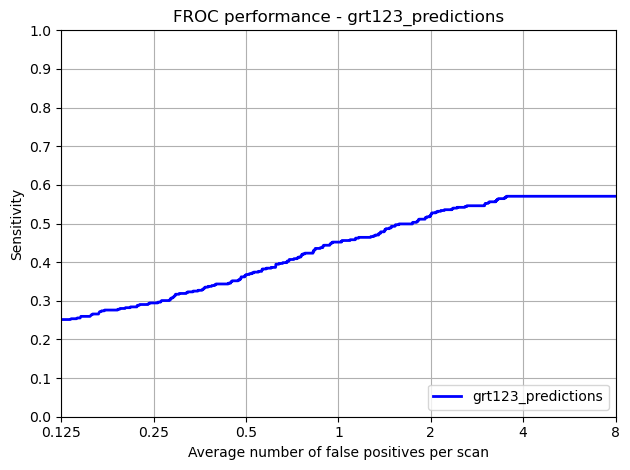

In [14]:
noduleCADEvaluation(annotations_filename=annotations_filepath,
                    annotations_excluded_filename=annotations_exclude_filepath,
                    seriesuids_filename=scanlist_filepath,
                    results_filename=predictions_filepath,
                    outputDir=output_dir)

In [38]:
# check the misses

misses = (
            pd.read_csv('../output/results/grt123/nodulesWithoutCandidate_grt123_predictions.txt', header=None)
            .rename(columns={
                0:'name',
                1:'idx',
                2:'col',
                3:'row',
                4:'index',
                5:'diameter',
                6:'candidate_idx'}
            )
)

misses = (
            misses
            .merge(combined_nodule_data, left_on='idx', right_on='id', suffixes=['_miss', ''])
            .merge(test_metadata, left_on='idx', right_index=True, suffixes=['', '_md'])
)


# Check distribution of type vs base distribution to see if one
# type of nodule is being missed
print('Nodule Type')
print((pd.concat([
    misses.nodule_type.value_counts(normalize=True).rename('misses (%)'),
    test_metadata.nodule_type.value_counts(normalize=True).rename('all (%)')
], axis=1).fillna(0) * 100).astype(int))

print(2 * '\n')
print('Management Plan')
print((pd.concat([
    misses.management_plan.value_counts(normalize=True).rename('misses (%)'),
    test_metadata.management_plan.value_counts(normalize=True).rename('all (%)')
], axis=1).fillna(0) * 100).astype(int))

print(2 * '\n')
print('Nodule Site')
print((pd.concat([
    misses.nodule_site.value_counts(normalize=True, dropna=False).rename('misses (%)'),
    test_metadata.nodule_site.value_counts(normalize=True, dropna=False).rename('all (%)')
], axis=1).fillna(0) * 100).astype(int))


print(2 * '\n')
print('Nodule Diameter')
print((pd.concat([
    misses.diameter.describe().rename('misses (%)'),
    test_metadata.nodule_diameter_mm.describe().rename('all (%)')
], axis=1)))


print(2 * '\n')
print('All - Site by Type (%)')
display(
(    pd.crosstab(
        test_metadata.nodule_type,
        test_metadata.nodule_site,
        margins=True,
        normalize=True
    ) * 100).astype(int)
)

print(2 * '\n')
print('Misses - Site by Type (%)')
display(
(    pd.crosstab(
        misses.nodule_type,
        misses.nodule_site,
        margins=True,
        normalize=True
    ) * 100).astype(int)
)





Nodule Type
               misses (%)  all (%)
SOLID                  39       43
CALCIFIED              35        7
NON_SOLID              11        2
PART_SOLID              7        2
ENDOBRONCHIAL           6        1
PERIFISSURAL            0       41



Management Plan
                         misses (%)  all (%)
3_MONTH_FOLLOW_UP_SCAN           83       28
ALWAYS_SCAN_AT_YEAR_1            11        2
URGENT_REFERRAL                   5        2
RANDOMISATION_AT_YEAR_1           0       66



Nodule Site
                   misses (%)  all (%)
RIGHT_UPPER_LOBE           32       22
NOT_ANSWERED               17       20
LEFT_UPPER_LOBE            16       13
RIGHT_LOWER_LOBE           14       16
LEFT_LOWER_LOBE            14       19
RIGHT_MIDDLE_LOBE           5        7



Nodule Diameter
       misses (%)      all (%)
count  210.000000  1482.000000
mean     6.267800     7.468758
std      4.262490     4.847620
min      0.000000     0.000000
25%      4.158691     4.700000
50%   

nodule_site,LEFT_LOWER_LOBE,LEFT_UPPER_LOBE,NOT_ANSWERED,RIGHT_LOWER_LOBE,RIGHT_MIDDLE_LOBE,RIGHT_UPPER_LOBE,All
nodule_type,,,,,,,
CALCIFIED,1,1,1,1,0,1,7
ENDOBRONCHIAL,0,0,0,0,0,0,1
NON_SOLID,0,0,0,0,0,1,2
PART_SOLID,0,0,0,0,0,0,2
PERIFISSURAL,9,2,12,7,4,4,41
SOLID,7,8,4,7,1,14,43
All,19,13,20,16,7,22,100





Misses - Site by Type (%)


nodule_site,LEFT_LOWER_LOBE,LEFT_UPPER_LOBE,NOT_ANSWERED,RIGHT_LOWER_LOBE,RIGHT_MIDDLE_LOBE,RIGHT_UPPER_LOBE,All
nodule_type,,,,,,,
CALCIFIED,6,5,7,6,4,5,35
ENDOBRONCHIAL,2,0,2,0,0,0,6
NON_SOLID,1,2,0,0,0,4,11
PART_SOLID,0,2,1,0,0,1,7
SOLID,2,5,4,5,0,19,39
All,14,16,17,14,5,32,100


In [64]:
import sys
sys.path.append('../utilities')

import importlib
import shutil
import summit_utils

importlib.reload(summit_utils)


misses = (
        pd.read_csv('../output/results/grt123/nodulesWithoutCandidate_grt123_predictions.txt', header=None)
        .rename(columns={
            0:'name',
            1:'idx',
            2:'col',
            3:'row',
            4:'index',
            5:'diameter',
            6:'candidate_idx'}
        ))

misses = misses.merge(test_metadata.rename(columns={'index':'nodule_index'}), left_on='idx', right_index=True)

image_details = [
    (missed_nodule['name'],summit_utils.Ircd(index=int(missed_nodule['index']), row=int(missed_nodule['row']), col=int(missed_nodule['col']),diameter=int(missed_nodule['diameter'])), missed_nodule['nodule_type'])
    for idx, missed_nodule in misses.iterrows()
]


IMAGE_DIR = '/Users/john/Projects/SOTAEvaluationNoduleDetection/output/results/grt123/images'
for img in sorted(image_details):
    for fil in os.listdir(IMAGE_DIR):

        if fil.startswith('summit'):
            _img = fil.split('_Y0_BASELINE_A_')
            _name = _img[0] + '_Y0_BASELINE_A'
            _coords = _img[1].split('_')

            if img[0] == _name and img[1].index == int(_coords[0]) and img[1].row == int(_coords[1]) and img[1].col == int(_coords[2]):
                print(f'Move {fil} to {img[2]}')
                
                to = Path(IMAGE_DIR, img[2])
                to.mkdir(parents=True, exist_ok=True)

                shutil.move(Path(IMAGE_DIR, fil), Path(to, fil))


Move summit-2263-tae_Y0_BASELINE_A_150_133_123_8_.png to ENDOBRONCHIAL
Move summit-2288-yke_Y0_BASELINE_A_142_132_56_11_.png to NON_SOLID
Move summit-2362-cku_Y0_BASELINE_A_152_50_120_6_.png to SOLID
Move summit-2397-yhy_Y0_BASELINE_A_57_83_197_5_.png to CALCIFIED
Move summit-2397-yhy_Y0_BASELINE_A_80_122_120_3_.png to CALCIFIED
Move summit-2397-yhy_Y0_BASELINE_A_160_46_64_1_.png to CALCIFIED
Move summit-2398-bzz_Y0_BASELINE_A_243_146_156_4_.png to SOLID
Move summit-2399-ewk_Y0_BASELINE_A_91_176_124_6_.png to SOLID
Move summit-2532-ntz_Y0_BASELINE_A_143_144_247_6_.png to SOLID
Move summit-2532-ntz_Y0_BASELINE_A_261_165_221_4_.png to SOLID
Move summit-2555-kwe_Y0_BASELINE_A_110_160_179_2_.png to CALCIFIED
Move summit-2555-kwe_Y0_BASELINE_A_207_99_72_6_.png to CALCIFIED
Move summit-2697-qwf_Y0_BASELINE_A_140_126_139_11_.png to CALCIFIED
Move summit-2697-xap_Y0_BASELINE_A_241_148_92_4_.png to SOLID
Move summit-2763-jpj_Y0_BASELINE_A_156_121_146_3_.png to ENDOBRONCHIAL
Move summit-2794-hnv